In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_test.shape

(10000, 28, 28)

In [ ]:

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
import matplotlib.pyplot as plt
#plt.imshow(X_train[1])

In [ ]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
X_train = X_train/255               #because it was taking much much time during converging


In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#Creating CNN from here:-
#Archiecture:-
#1) 2 convolution layers
#2) 2 max. pooling layers
#3) flaten 
#4) Dense layer
#5) Dense Output layer {Will have 10 nodes, because its classifier for 10 nodes}


In [ ]:
#importing from keras

from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) 
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))  
model.add(MaxPooling2D((2,2)))

model.add(Flatten())  #3)

model.add(Dense(128,activation='relu'))  #4)

model.add(Dense(10,activation='softmax'))  #5








In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
#compile and then fit


In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 7s 7ms/step - loss: 0.3069 - accuracy: 0.9439 - val_loss: 0.0671 - val_accuracy: 0.9815
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0629 - accuracy: 0.9814 - val_loss: 0.0516 - val_accuracy: 0.9848
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0733 - val_accuracy: 0.9807
Epoch 4/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0466 - val_accuracy: 0.9877
Epoch 5/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0417 - val_accuracy: 0.9902
Epoch 6/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0687 - val_accuracy: 0.9797
Epoch 7/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0503 - val_accuracy: 0.9888
Epoch 

In [ ]:
#test data

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9819


[0.08341734111309052, 0.9818999767303467]

In [ ]:
model.save("model.h5")

In [ ]:
model.predict(X_test)

array([[6.7201163e-15, 8.3853218e-17, 3.2163178e-12, ..., 9.9999988e-01,
        1.5541175e-12, 1.9311035e-09],
       [1.6732737e-15, 6.3655619e-15, 1.0000000e+00, ..., 2.5405586e-16,
        1.2157922e-16, 3.0362514e-20],
       [1.8086529e-12, 9.9977690e-01, 2.7332073e-08, ..., 2.2308451e-04,
        6.5571206e-09, 1.9259880e-12],
       ...,
       [8.6876936e-22, 1.0338715e-14, 2.2448431e-15, ..., 5.6589147e-12,
        5.6547843e-15, 2.4156366e-13],
       [1.1666486e-18, 1.3886875e-20, 8.8871752e-21, ..., 2.5638271e-16,
        1.7054489e-12, 1.9243335e-14],
       [5.4190138e-13, 7.3423503e-17, 8.1035041e-15, ..., 1.4392289e-18,
        3.6963642e-16, 3.8016268e-17]], dtype=float32)

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
#model.predict_classes(X_test)
import numpy as np
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#X_test.shape(10000,28,28)
X_test = X_test.reshape(10000,28,28)
#plt.imshow(X_test[0])

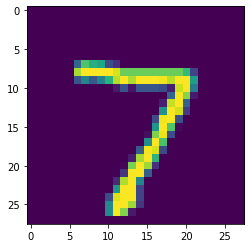

In [ ]:
plt.imshow(X_test[0])

In [ ]:




#model final when new pic is there

In [ ]:
to_test=X_test[0]
to_test=to_test.reshape(1,28,28,1)
predict_x0=model.predict(to_test)
classes_x0=np.argmax(predict_x0,axis=1)
classes_x0[0]

7